In [22]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

---
<center><h1> Chapter 5: The Wave Equation </h1></center>

---


---
## Introduction
---

The wave equation is a type of hyperbolic PDE (by comparison, the heat equation was a type of parabolic PDE). 
The general form in a single spatial dimension is
$$
    u_{tt} = c^2 u_{xx}.
$$
The parameter $c$ is called the ***wave speed***, and we will typically just set it to be $1$ for simplicity. 

As before, we will specify boundary conditions on the spatial domain.
However, unlike before, the wave equation involves two derivatives in time, so initial conditions are typically specified for both $u(x,0)$ and $u_t(x,0)$, i.e., we usually specify an initial configuration for the wave $u(x,0)$ as well as the waves initial velocity $u_t(x,0)$.

Therefore, a typical IBVP for the wave equation, using homogeneous Dirichlet conditions on the boundary, is written as
\begin{eqnarray*}
    u_{tt} &=& u_{xx}, \ \ \ \ \ \ \ x\in(0,1), \ t>0, \\
    u(0,t) &=& u(1,t) = 0, \ \ \ \ \ \ \ \ \ \ \ \ \ t>0, \\
    u(x,0) &=& f(x), \ \ \ \ \ x\in(0,1) \\
    u_t(x,0) &=& g(x), \ \ \ \ \ x\in(0,1).
\end{eqnarray*}

---
## Section 5.1: Separation of Variables
---

We play the same game as we did with the heat equation.
   
   - Assume that $u(x,t) = X(x)T(t)$
   
   <br>
   - Insert $X(x)T(t)$ into the wave equation and separate variables
   
   <br>
   - Solve the same two-point BVP we did before for to get that
   
   <br>
   $$X_k(x)=\sin(k\pi x)$$ 
   
   for each eigenvalue $\lambda_k = (k\pi)^2$ for $k\in\mathbb{N}$. 
   
   <br>
   - The IVP for the ODE defined by $T(t)$ is now different with general solutions given by 
       
   <br>
   $$T_k(t) = a_k \cos(k\pi t) + b_k\sin(k\pi t)$$ 
   
   for given eigenvalue $\lambda_k$.
   
   <br>
   - Conclude that a family of particular solutions is of the form (5.11)
   
   <br>
   $$
       u_k(x,t) = \sin(k\pi x)\left(a_k\cos(k\pi t) + b_k\sin(k\pi t)\right)
   $$
   
   and that these have initial conditions given by
   
   <br>
   $$
       u_k(x,0) = a_k\sin(k\pi x), \ \text{ and } \ (u_k)_t(x,0) = k\pi b_k \sin(k\pi x).
   $$
   
### Take home message 1
Any linear combination of particular solutions solves the PDE, boundary conditions, and has an initial condition given by the linear combination of the initial conditions for the particular solutions.

### Take home message 2
If initial conditions $f(x)$ and $g(x)$ can be written as Fourier sine series, e.g., as

<br>
$$
    f(x) = \sum_{k=1}^\infty a_k\sin(k\pi x) \ \text{ and } \ g(x) = \sum_{k=1}^\infty b_k\sin(k\pi x), 
$$

then the formal solution of the IBVP is given by
$$
    u(x,t) = \sum_{k=1}^\infty \sin(k\pi x)\left(a_k\cos(k\pi t) + \frac{b_k}{k\pi}\sin(k\pi t)\right).
$$


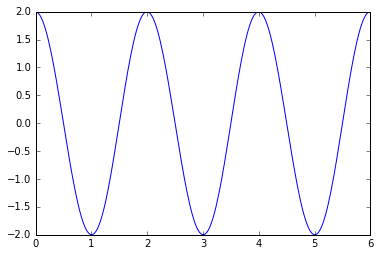

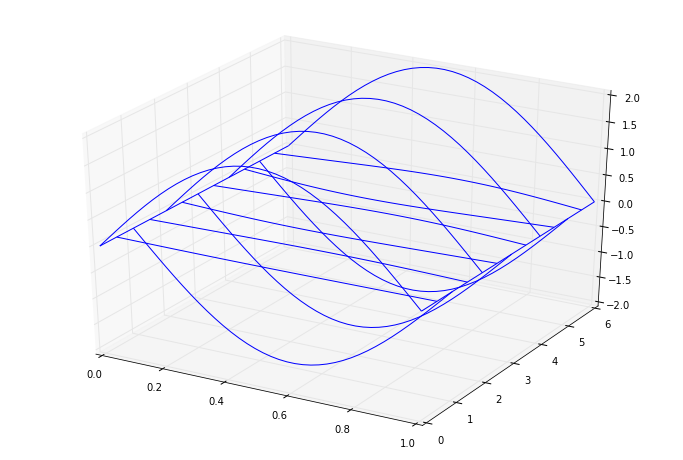

In [89]:
# Example 5.1

a_1 = 2
b_2 = -1/(2*np.pi)

def u(x,t):
    return a_1*np.sin(np.pi*x)*np.cos(np.pi*t) - \
        b_2 *np.sin(2*np.pi*x)*np.sin(2*np.pi*t)
    
x = np.linspace(0,1,40)
t = np.linspace(0,6,240)
plt.figure()
plt.plot(t,u(x[20],t))

x, t = np.meshgrid(x, t)

fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection='3d')

ax.plot_wireframe(x,t,u(x,t), rstride=20, cstride=40)



---
## Section 5.2: Uniqueness and Energy Arguments
---

The main difference from before is that we now define the "energy" of the system $E(t)$ as

<br>
$$
    E(t) = \int_0^1 (u_x^2(x,t) + u_t^2(x,t))\, dx.
$$

We observe that 

$$
    E(0) = \int_0^1 ((f')^2(x,t) + g^2(x,t))\, dx. 
$$

Through some assumptions, Proposition 3.1, and calculus, we get that

$$
    E'(t) = 0 \ \forall t \Rightarrow E(t) = E(0),  \ t\geq 0.
$$

From this, we obtain a stability estimate (Eq. (5.18) in the text) and uniqueness of solutions. 

---
## Section 5.3: A Finite Difference Approximation
---

The text uses centered second order finite difference approximations in both space and time.

In the text, they are deriving an explicit scheme by assuming that the spatial discretization is evaluated at the current time step while in Exercises 5.9 and 5.10 we consider an implicit scheme by instead assuming that the spatial discretization is evaluated at the next time step. 